# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Your code here. 
Age = [17,51,27,21,36,48,19,26,54,30]
Tardies = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'Age': Age, 'Tardies': Tardies})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

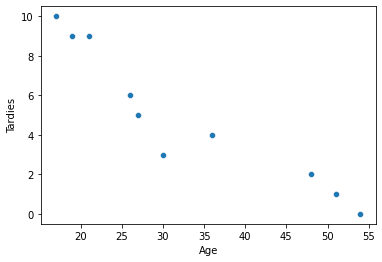

In [3]:
# Your code here.
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

'''
A simple vista se puede ver que la relación age/tardies es inversamente proporcional. 
Es decir, a mayor age, menos tardies.
''';


#### Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.


**covarianza:** mide la relación lineal entre dos variables. Sus valores no están estandarizados. En el estudio de la covarianza sólo importa el signo:
 - (+): ambas variables varían en la misma dirección.
 - (-): las variables varían en la dirección opuesta.
    
**correlacion:** mide tanto la fuerza como la dirección de la relación lineal entre dos variables. Sus valores están estandarizados entre -1 y 1.
 - (+): variables directamente proporcionales, más iguales cuanto más cerca de 1.
 - (-): variables inversamente proporcionales, más inversamente iguales cuanto más cerca de -1.
 - (0): no existe una relación lineal entre las variables. Podría existir otra relación funcional.


In [5]:
# Your response here.
cor = pd.concat([student_data.Age,student_data.Tardies],axis=1).corr()['Age']['Tardies']
cov =pd.concat([student_data.Age,student_data.Tardies],axis=1).cov()['Age']['Tardies']
print(f"Corr = {cor}\nCov = {cov}")

Corr = -0.9391626886887122
Cov = -45.56666666666667


La relación entre la edad y llegar tarde es inversamente proporcional casi al 94%

###### Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
from sklearn.linear_model import LinearRegression

In [9]:
# Creo objeto
lr = LinearRegression(fit_intercept=True)

# Entreno al modelo
lr.fit(student_data["Age"].to_frame(),student_data["Tardies"])

# Hago predicciones de la variable independiente. Quiero adivinar la edad en funcion de lo tarde que llega
tardies_predict= lr.predict(student_data["Age"].to_frame())


What will be your outcome variable? : variable dependiente.

    - Tardies
    
What type of regression are you using?

    - Lineal


###### Plot your regression model on your scatter plot.

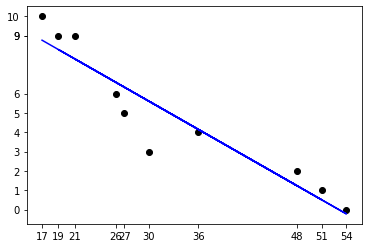

In [10]:
# Your code here.
plt.scatter(student_data["Age"], student_data["Tardies"],  color='black')
plt.plot(student_data["Age"], tardies_predict, color='blue')

plt.xticks((student_data["Age"]))
plt.yticks((student_data["Tardies"]))

plt.show()

##### Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
# Your response here. 
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(student_data["Tardies"], tardies_predict)
mse = mean_squared_error(student_data["Tardies"], tardies_predict)
print(f"R2 = {r2}\nmse = {mse}")

R2 = 0.8820265558250109
mse = 1.3319201847356268


La relación entre la edad y el llegar tarde es inversamente proporcial. 

El llegar tarde depende de la edad en un 88.2%, es decir, existe una relación fuerte entre ambas. Por tanto podemos afirmar que la edad nos permite predecir bastante bien si esa persona llegará tarde.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to **predict vehicles' CO2 emissions based on several independent variables**. 

In [3]:
# Import any libraries you may need & the data

In [24]:
df = pd.read_csv('vehicles.csv', usecols=['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile'])
df.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome (dependent) variable. 

##### Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
# Your response here. 
df[['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']].corrwith(df['CO2 Emission Grams/Mile'])

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

La que está más relacionada con la emisión de CO2 es la cantidad de veces que relleno el depósito al año, como era de esperar. 

La que menos relacionada está con la emisión de CO2 es el año, lo cual tmb me sorprende porque pensaba que se irian haciendo coches que emiten menos CO2 de manera más radical. Aún así, la relación entre ambas es inversamente proporcional, lo que tiene sentido.

##### Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

(0.9808734920269122, 16.465711496024074)

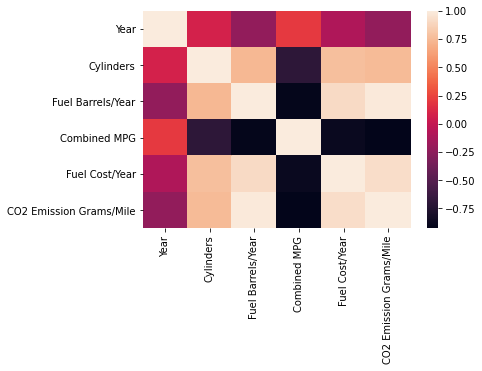

In [47]:
# Your response here. 
X = df[['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)
lm.coef_
lm.intercept_
y_pred = lm.predict(X)
r2 = r2_score(y_pred=y_pred, y_true=y)
rmse = mean_squared_error(y_pred=y_pred, y_true=y)**.5
sns.heatmap(pd.concat([X,y],axis=1).corr())
r2,rmse

##### Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [72]:
# Your response here.
import statsmodels.api as sm
X = df[['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']
X = sm.add_constant(X)
res = sm.OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                             17:37:30   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(No estoy muy segura pero...)
La emisión de CO2 depende del resto de variables en un 98.1% ya que ese es el valor de R2.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [75]:
x = [1,3,4,6,8,9,11,14]
y = [1,2,4,4,5,7,8,13]
df = pd.DataFrame({"x":x,"y":y})
df

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

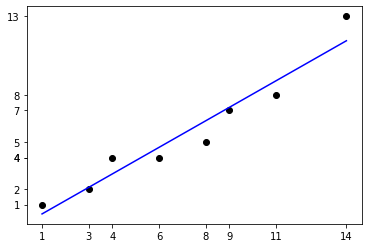

In [79]:
# Your code here.

# Creo objeto
lr = LinearRegression(fit_intercept=True)

# Entreno al modelo
lr.fit(df.x.to_frame(),df.y)

# Hago predicciones de la variable independiente. Quiero adivinar la edad en funcion de lo tarde que llega
y_predict= lr.predict(df.x.to_frame())


plt.scatter(x, y,  color='black')
plt.plot(df.x, y_predict, color='blue')

plt.xticks((x))
plt.yticks((y))

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [80]:
# Your response here. 
'''
Efectivamente la relacion entre gente que invitamos y gente que viene es directamente proporcional.
Los datos se adaptan al 93%
'''

r2 = r2_score(df.y, y_predict)
mse = mean_squared_error(df.y, y_predict)
print(f"R2 = {r2}\nmse = {mse}")

R2 = 0.9316696375519905
mse = 0.8712121212121213


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

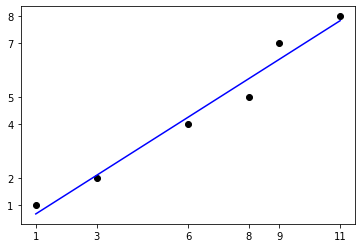

R2 = 0.9723364485981308
mse = 0.17289719626168218


In [86]:
# Your response here. 
# los puntos problematicos son aquellos en los que los asistentes son iguales (o casi) que los invitados
x = [1,3,6,8,9,11]
y = [1,2,4,5,7,8]
df = pd.DataFrame({"x":x,"y":y})
lr = LinearRegression(fit_intercept=True)
# Entreno al modelo
lr.fit(df.x.to_frame(),df.y)
# Hago predicciones de la variable independiente. Quiero adivinar la edad en funcion de lo tarde que llega
y_predict= lr.predict(df.x.to_frame())
plt.scatter(x, y,  color='black')
plt.plot(df.x, y_predict, color='blue')
plt.xticks((x))
plt.yticks((y))
plt.show()
r2 = r2_score(df.y, y_predict)
mse = mean_squared_error(df.y, y_predict)
print(f"R2 = {r2}\nmse = {mse}")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [87]:
# Your response here. 

'''
La recta de regresion se adapta mejor sin esos puntos
'''

'\nLa recta de regresion se adapta mejor sin esos puntos\n'